# ECE657A: Data and Knowledge Modeling and Analysis
    Group 14:
    Amanpalsingh Bhusari - 21057903
    Heer Mayankkumar Patel - 21066455
    Manavjit Singh Dhindsa - 21050627

# Question 1 - Data Cleaning and Preprocessing (for dataset A)

Leveraging pandas for data manipulation and data anlysis

Leveraging numpy for numerical computing

Leveraging seaborn and matplotlib for data visulization 

Tool used: Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 1. Detect any problems that need to be fixed in dataset A. Report such problems.

In [2]:
dataA = pd.read_csv('DataA.csv')
dataA.head()

#finding shape of dataA
print('DataA Rows : ', dataA.shape[0])
print('DataA Columns : ', dataA.shape[1])

DataA Rows :  19000
DataA Columns :  82


dataA consists of 19000 rows and 82 columns.

Unnamed: 0       0
fea.1         1187
fea.2         1188
fea.3         1187
fea.4          800
              ... 
fea.77         773
fea.78         773
fea.79         773
fea.80         773
fea.81         773
Length: 82, dtype: int64


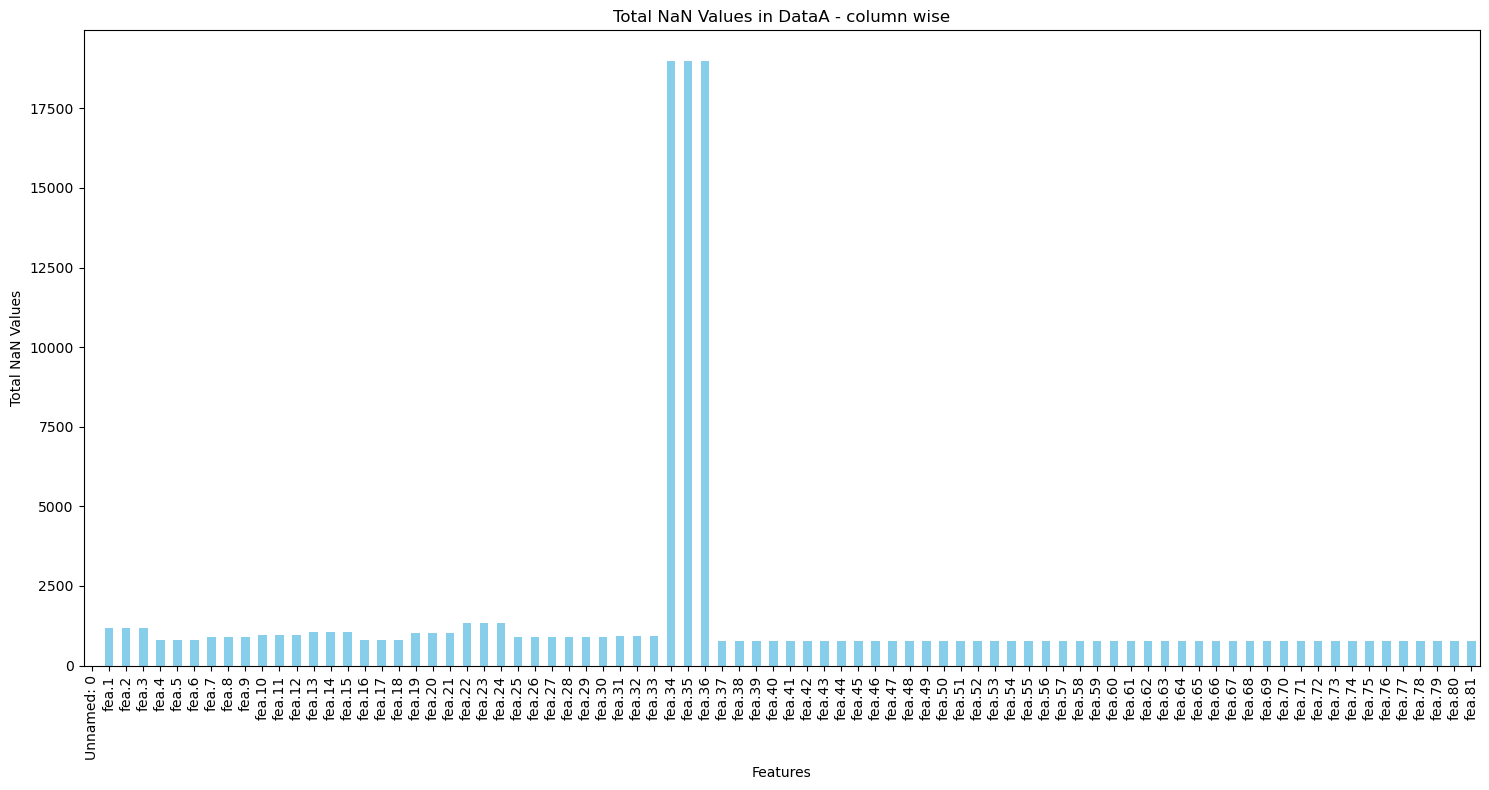

In [3]:
#summing all nan values prein each column
nan_counts = dataA.isnull().sum()
print(nan_counts)

#plotting nan_counts to know about present nan values in each feature
nan_counts.plot(kind='bar', figsize=(15, 8), color='skyblue')
plt.title(f'Total NaN Values in DataA - column wise')
plt.xlabel('Features')
plt.ylabel('Total NaN Values')
plt.tight_layout()
plt.show()

In above graph, number of nan values can be observed among 81 features.

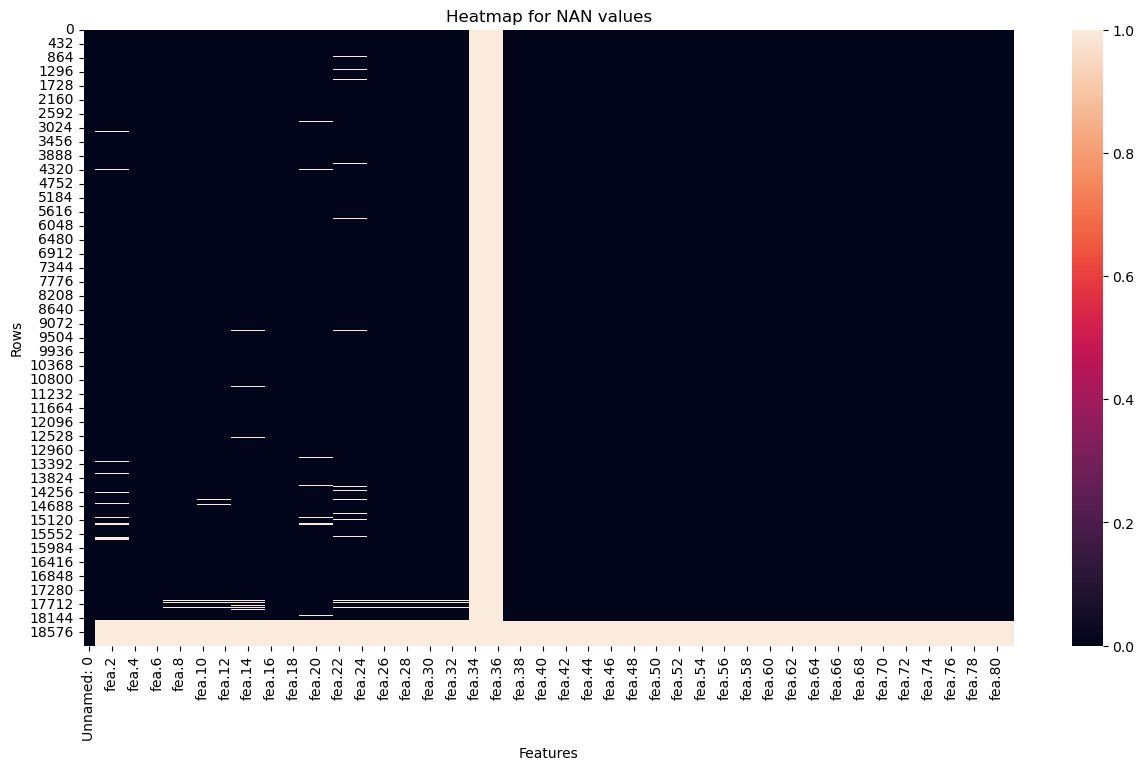

(19000, 82)

In [4]:
#plotting heatmap to know about existance of NAN values
plt.figure(figsize=(15, 8))  
sns.heatmap(dataA.isnull())
plt.title('Heatmap for NAN values')  
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()
dataA.shape

From above heatmap, it is clear that Rows from 18144 to 18576, and fea.34, fea.35, fea.36 all consists of NAN values.

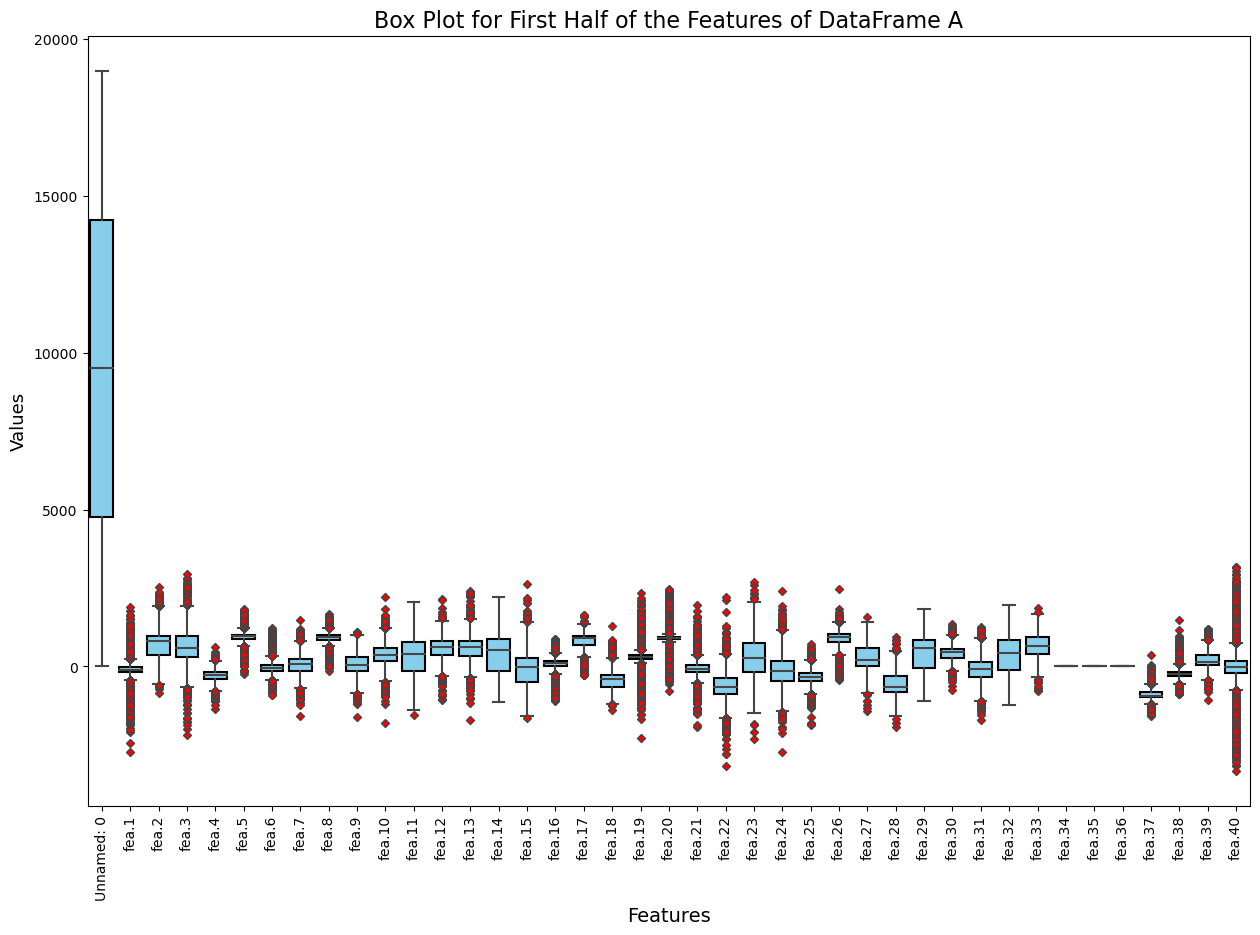

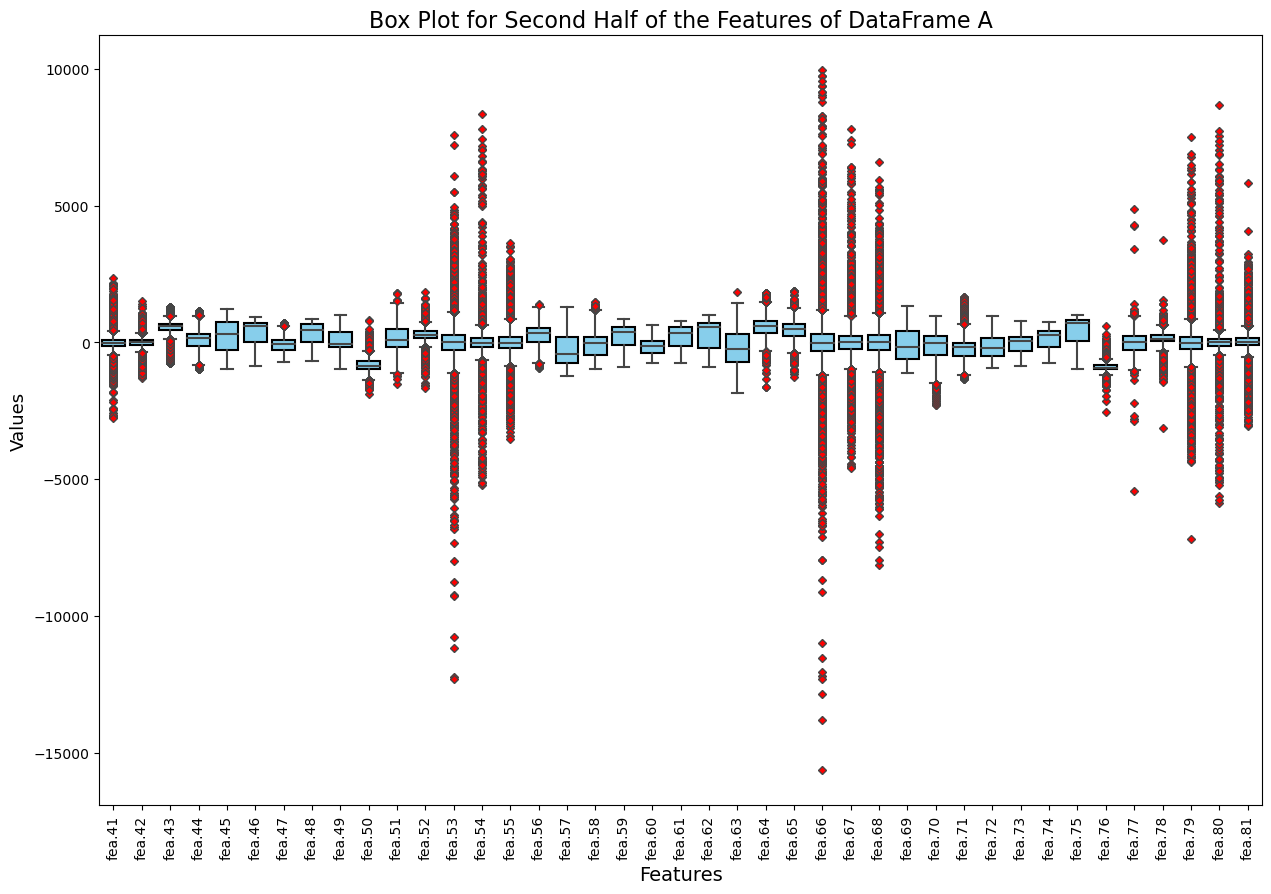

In [5]:
figure = plt.figure(figsize=(15,10))

#plotting box plot
#features from fea.1 to fea.42
data_first_half = dataA.iloc[:,:round(len(dataA.columns)/2)] 
sns.boxplot(data=data_first_half, boxprops=dict(facecolor="skyblue", edgecolor="black"),
           flierprops=dict(marker='D', markerfacecolor='red', markersize=4, linestyle='none')) 
plt.title("Box Plot for First Half of the Features of DataFrame A", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=13)
plt.xticks(rotation=90)
plt.show()

#features from fea.43 to fea.81
figure = plt.figure(figsize=(15,10))
data_first_half = dataA.iloc[:,round(len(dataA.columns)/2):round(len(dataA.columns))] 
sns.boxplot(data=data_first_half, boxprops=dict(facecolor="skyblue", edgecolor="black"),
           flierprops=dict(marker='D', markerfacecolor='red', markersize=4, linestyle='none')) 
plt.title("Box Plot for Second Half of the Features of DataFrame A", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=13)
plt.xticks(rotation=90)
plt.show()


From above, we can observe that red dots are outliers, and from fea.1 to fea.81 outliers can be visualised as above.

# Problems Encountered, so far:

- Unnamed column present in dataset.
- Features having NAN values in all rows.
- Duplication of data present in dataA (Row).
- Outliers present in dataA.


# 2. Fix the detected problems using some of the methods discussed in class.. 


# Problems encountered above are solved as follows:

- Dropping unnamed column 
- Dropping all features based on NAN values present in them 
- Dropping all rows which are having same values in features
- Used IQR for detecting and removing outliers
    

In [6]:
dataA.shape

(19000, 82)

In [7]:
# finding percentage of nan values exists in each feature 
fea34_nan_percent = dataA['fea.34'].isnull().sum()/dataA['fea.34'].size * 100
fea35_nan_percent = dataA['fea.35'].isnull().sum()/dataA['fea.35'].size * 100
fea36_nan_percent = dataA['fea.36'].isnull().sum()/dataA['fea.36'].size * 100

print('Percentage of Feature 34 consisting NAN values: ',round(fea34_nan_percent,2),'%')
print('Percentage of Feature 35 consisting NAN values: ',round(fea35_nan_percent,2),'%')
print('Percentage of Feature 36 consisting NAN values: ',round(fea36_nan_percent,2),'%')

Percentage of Feature 34 consisting NAN values:  99.99 %
Percentage of Feature 35 consisting NAN values:  99.99 %
Percentage of Feature 36 consisting NAN values:  99.99 %


As all fea.34, fea.35, fea.36 are having 99.99% NAN values, we can eliminate these features

In [8]:
#dropping 'fea.34','fea.35','fea.36' due to high number of NAN values
dataA = dataA.drop(dataA.columns[0],axis=1)
column_drop = ['fea.34','fea.35','fea.36']
dataA = dataA.drop(column_drop, axis=1)

In [9]:
dataA.shape

(19000, 78)

After dropping columns/ features, we are having 19000 rows and 78 columns

In [10]:
#eliminating all rows which are having nan in all features
dataA = dataA.dropna(how='all')
print('Number of duplicate rows after getting rid of all rows NAN values: ',dataA.duplicated().sum()) 
print('dataA new dimension: ',dataA.shape)

Number of duplicate rows after getting rid of all rows NAN values:  0
dataA new dimension:  (18227, 78)


After getting rid of all rows which are having all NAN values, and features which are having significant amount of NAN values, 
dataA is remained with 18277 rows and 78 columns.

In [11]:
dataA = dataA.fillna(dataA.median())

Interpolating with the median involves substituting extreme values with a central value, thereby preserving the general distribution of the data.

fea.1     0
fea.2     0
fea.3     0
fea.4     0
fea.5     0
         ..
fea.77    0
fea.78    0
fea.79    0
fea.80    0
fea.81    0
Length: 78, dtype: int64


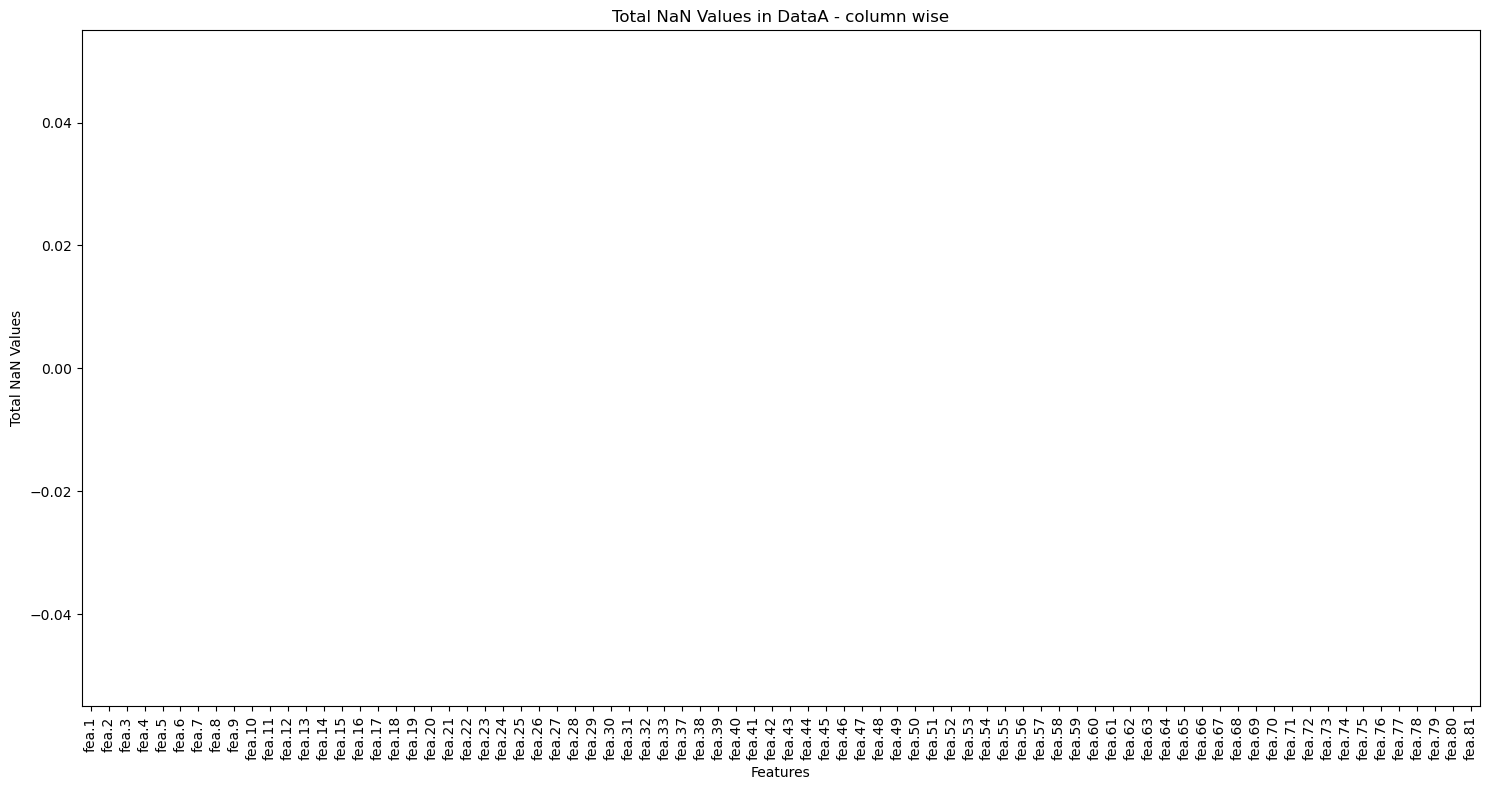

In [12]:
#summing all nan values in each column
nan_counts = dataA.isnull().sum()
print(nan_counts)

#plotting nan_counts to know about present nan values in each feature
nan_counts.plot(kind='bar', figsize=(15, 8), color='skyblue')
plt.title(f'Total NaN Values in DataA - column wise')
plt.xlabel('Features')
plt.ylabel('Total NaN Values')
plt.tight_layout()
plt.show()

It can be seen from the graph that all NAN values have been handled. And for that we interploated all NAN vavlues present in column with median

In [13]:
dataA_no_outliers = dataA.copy()
for i in range(1, 78):
    column_name = f'fea.{i}'    
    if column_name in dataA.columns:
        q1 = dataA[column_name].quantile(0.25)
        q3 = dataA[column_name].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        #dataA[column_name] = dataA[column_name][(dataA[column_name] >= lower_bound) & (dataA[column_name] <= upper_bound)]
        dataA_no_outliers[column_name] = dataA_no_outliers[column_name][(dataA_no_outliers[column_name] >= lower_bound) & (dataA_no_outliers[column_name] <= upper_bound)]        

dataA_no_outliers.dropna(inplace=True)
dataA_no_outliers.reset_index(drop=True, inplace=True)

In above code, Removal of outliers has been done using IQR. 

In [14]:
print('After outlier detection, remained rows and column in dataset: ',dataA_no_outliers.shape)
print('After removing all outliers, dataA is remained with ',dataA_no_outliers.shape[0], 'rows and',dataA_no_outliers.shape[1], 'column.')

After outlier detection, remained rows and column in dataset:  (6379, 78)
After removing all outliers, dataA is remained with  6379 rows and 78 column.


# 3. Normalize the data using min-max and z-score normalization. Plot histograms of feature 9 and 24; compare and comment on the differences before and after normalization.

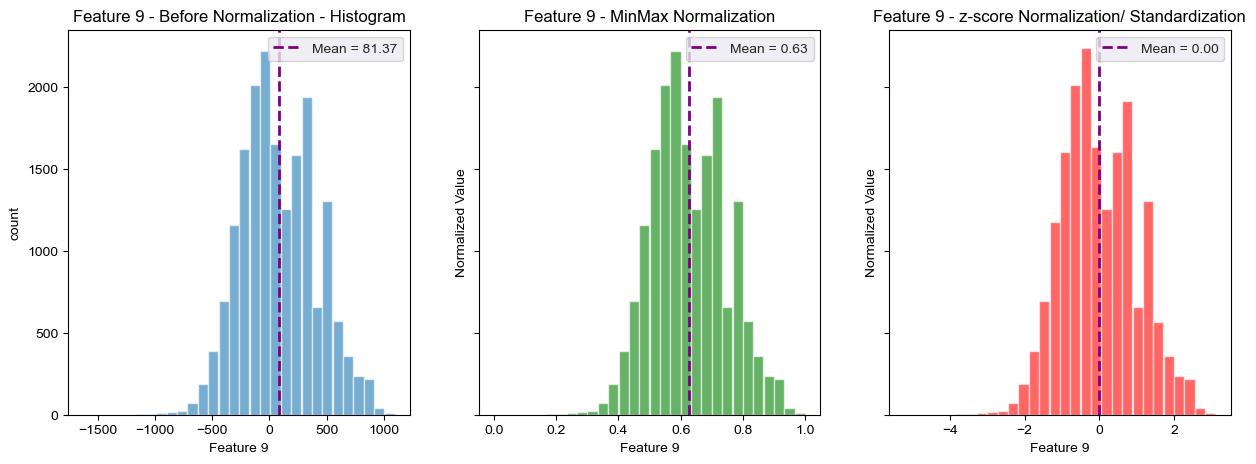

,Feature9,before normalization,after min-max,after z-score normalization
0,Mean,81.365008,0.626972,0.000000
1,SD,326.759586,326.759586,0.999973


In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5),  sharey=True,gridspec_kw={'hspace': 0.4})  

sns.set_style("darkgrid")
f9_mean_before_norm = np.mean(dataA['fea.9'])
f9_sd_before_norm = np.std(dataA['fea.9'])
axs[0].hist(dataA['fea.9'],bins=30,rwidth=0.98,alpha=0.6)
axs[0].set_title('Feature 9 - Before Normalization - Histogram')
axs[0].set_xlabel('Feature 9')
axs[0].set_ylabel('count')
axs[0].axvline(x=f9_mean_before_norm, color='purple', linestyle='--', linewidth=2, label=f'Mean = {f9_mean_before_norm:.2f}')
axs[0].legend(loc='upper right')

min_val = dataA['fea.9'].min()
max_val = dataA['fea.9'].max()
normalized_col9 = (dataA['fea.9'] - min_val) / (max_val - min_val)
axs[1].hist(normalized_col9,bins=30,rwidth=0.98, color='green',alpha=0.6)
axs[1].set_title('Feature 9 - MinMax Normalization')
axs[1].set_xlabel('Feature 9')
axs[1].set_ylabel('Normalized Value')
f9_mean_minmax_norm = np.mean(normalized_col9)
f9_sd_minmax_norm = np.std(normalized_col9)
axs[1].axvline(x=f9_mean_minmax_norm, color='purple', linestyle='--', linewidth=2, label=f'Mean = {f9_mean_minmax_norm:.2f}')
axs[1].legend(loc='upper right')

mean_val = dataA['fea.9'].mean()
std_val = dataA['fea.9'].std()
normalized_column_z9 = (dataA['fea.9'] - mean_val) / std_val
axs[2].hist(normalized_column_z9,bins=30,rwidth=0.98, color='red',alpha=0.6)
f9_mean_z_norm = np.mean(normalized_column_z9)
f9_sd_z_norm = np.std(normalized_column_z9)
axs[2].set_title('Feature 9 - z-score Normalization/ Standardization')
axs[2].set_xlabel('Feature 9')
axs[2].set_ylabel('Normalized Value')
axs[2].axvline(x=f9_mean_z_norm, color='purple', linestyle='--', linewidth=2, label=f'Mean = {f9_mean_z_norm:.2f}')
axs[2].legend(loc='upper right')

plt.show()

data = {
    'Feature9': ['Mean', 'SD'],
    'before normalization': [f9_mean_before_norm,f9_sd_before_norm],
    'after min-max': [f9_mean_minmax_norm,f9_sd_before_norm],
    'after z-score normalization': [f9_mean_z_norm,f9_sd_z_norm]
}
df = pd.DataFrame(data)
styled_df = df.style.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', 'lightgrey'), 
               ('color', 'black'), 
               ('font-weight', 'bold'),
               ('text-align', 'center')]},
    {'selector': 'td',
     'props': [('text-align', 'center')]}
])

styled_df

In above figure, histogram has been ploted for feature 9. 

Before normalization, Mean of distributed data is 81.36, and S.d. of distributed data is 326.75

After doing Min-Max normalization, Minimum value has been replaced by 0, and maximum value has been replaced by 1, and all other values are in range from 0 to 1. 

After doing Min-Max normalization, Mean comes out as 0.6, and s.d. comes out as 326.75

After doing z-score normalization, Mean comes out as 0, and s.d. comes out as 0.99, which is nearly equal to 1.


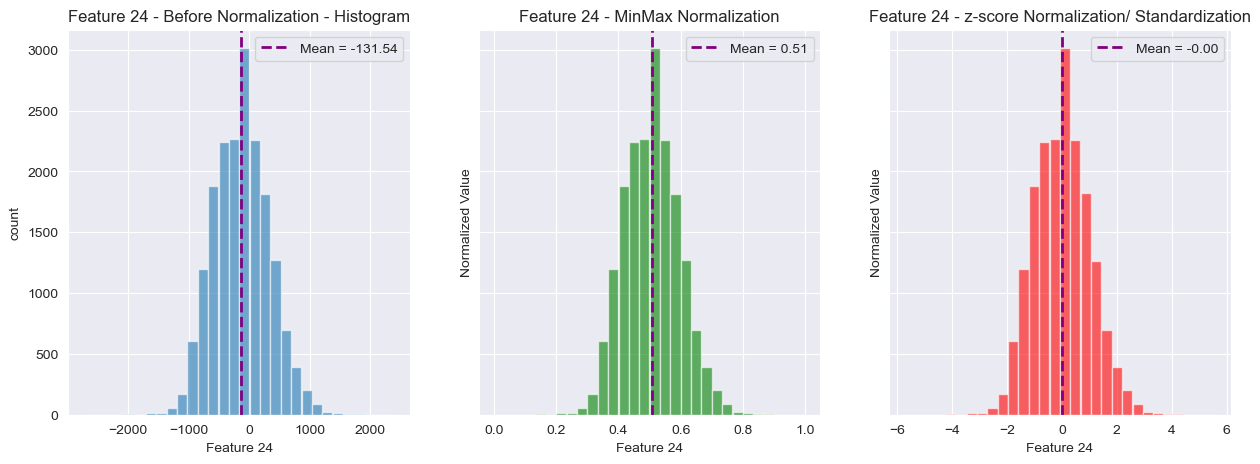

,Feature24,before normalization,after min-max,after z-score normalization
0,Mean,-131.538871,0.506808,-0.000000
1,SD,453.073699,453.073699,0.999973


In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5),sharey=True,gridspec_kw={'hspace': 0.4})  
sns.set_style("darkgrid")

f24_mean_before_norm = np.mean(dataA['fea.24'])
f24_sd_before_norm = np.std(dataA['fea.24'])
axs[0].hist(dataA['fea.24'],bins=30,rwidth=0.98,alpha=0.6)
axs[0].set_title('Feature 24 - Before Normalization - Histogram')
axs[0].set_xlabel('Feature 24')
axs[0].set_ylabel('count')
axs[0].axvline(x=f24_mean_before_norm, color='purple', linestyle='--', linewidth=2, label=f'Mean = {f24_mean_before_norm:.2f}')
axs[0].legend(loc='upper right')

min_val = dataA['fea.24'].min()
max_val = dataA['fea.24'].max()
normalized_col24 = (dataA['fea.24'] - min_val) / (max_val - min_val)
axs[1].hist(normalized_col24,bins=30,rwidth=0.98, color='green',alpha=0.6)
axs[1].set_title('Feature 24 - MinMax Normalization')
axs[1].set_xlabel('Feature 24')
axs[1].set_ylabel('Normalized Value')
f24_mean_minmax_norm = np.mean(normalized_col24)
f24_sd_minmax_norm = np.std(normalized_col24)
axs[1].axvline(x=f24_mean_minmax_norm, color='purple', linestyle='--', linewidth=2, label=f'Mean = {f24_mean_minmax_norm:.2f}')
axs[1].legend(loc='upper right')

mean_val = dataA['fea.24'].mean()
std_val = dataA['fea.24'].std()
normalized_column_z24 = (dataA['fea.24'] - mean_val) / std_val
axs[2].hist(normalized_column_z24,bins=30,rwidth=0.98, color='red',alpha=0.6)
f24_mean_z_norm = np.mean(normalized_column_z24)
f24_sd_z_norm = np.std(normalized_column_z24)
axs[2].set_title('Feature 24 - z-score Normalization/ Standardization')
axs[2].set_xlabel('Feature 24')
axs[2].set_ylabel('Normalized Value')
axs[2].axvline(x=f24_mean_z_norm, color='purple', linestyle='--', linewidth=2, label=f'Mean = {f24_mean_z_norm:.2f}')
axs[2].legend(loc='upper right')

plt.show()

data = {
    'Feature24': ['Mean', 'SD'],
    'before normalization': [f24_mean_before_norm,f24_sd_before_norm],
    'after min-max': [f24_mean_minmax_norm,f24_sd_before_norm],
    'after z-score normalization': [f24_mean_z_norm,f24_sd_z_norm]
}
df = pd.DataFrame(data)
styled_df = df.style.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', 'lightgrey'), 
               ('color', 'black'), 
               ('font-weight', 'bold'),
               ('text-align', 'center')]},
    {'selector': 'td',
     'props': [('text-align', 'center')]}
])

styled_df

In above figure, histogram has been ploted for feature 24. 

Before normalization, Mean of distributed data is -134.53, and S.d. of distributed data is 453.07

After doing Min-Max normalization, Minimum value has been replaced by 0, and maximum value has been replaced by 1, and all other values are in range from 0 to 1. 

After doing Min-Max normalization, Mean comes out as 0.5, and s.d. comes out as 453.07

After doing z-score normalization, Mean comes out as 0, and s.d. comes out as 0.99, which is nearly equal to 1.




# Question 2 

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors and eigenvalues

In [18]:
dataB = pd.read_csv('DataB.csv', header=0)
dataB.head()
dataB.isnull().sum()

# Extract the class labels
labels = dataB['gnd']

In [19]:
dataB.keys()

Index(['Unnamed: 0', 'fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6',
       'fea.7', 'fea.8', 'fea.9',
       ...
       'fea.776', 'fea.777', 'fea.778', 'fea.779', 'fea.780', 'fea.781',
       'fea.782', 'fea.783', 'fea.784', 'gnd'],
      dtype='object', length=786)

It can be seen that 'unnamed:0' column is basically an index, and 'gnd' is basically a target.

In the following code, these 2 columns are dropped, and later we checked whether any NAN value exists in dataset, which resulted in saying that there does not exist any NAN value

Eigen value can be computed with the help of covariance matrix, which is being showed below.

In [20]:
print('DataB Rows : ', dataB.shape[0])
print('DataB Columns : ', dataB.shape[1])
print('Duplicate data present: ',dataB.duplicated().sum())


# Exclude the identifier and label columns for PCA
df_features = dataB.iloc[:, 1:-1]
# df_features = df
# Initialize the StandardScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
# Standardize the feature data to perform PCA
df_features_scaled = scaler.fit_transform(df_features)

# Initialize PCA
pca = PCA()
# Apply PCA to the standardized data and compute principal components
pca.fit(df_features_scaled)
# Extract eigenvectors and eigenvalues
evec = pca.components_
eval = pca.explained_variance_


# printing eigenvectors and eigenvalues
print("Eigenvectors:\n", evec[:5])
print("\nEigenvalues:\n", eval[:5])
df_features.head()


DataB Rows :  2066
DataB Columns :  786
Duplicate data present:  0
Eigenvectors:
 [[ 0.00197863  0.00151307 -0.00049178 ... -0.0001125  -0.00132315
   0.00591181]
 [-0.00493308  0.00640373  0.00156563 ... -0.00300533 -0.00947149
  -0.00287621]
 [-0.00037529  0.00258725 -0.00372451 ... -0.00335936  0.00553066
   0.00624184]
 [ 0.0061542   0.00279038 -0.00322624 ...  0.00381145 -0.00109931
   0.00327647]
 [-0.0032507   0.00376721  0.00138427 ...  0.00138768 -0.00260272
  -0.00052576]]

Eigenvalues:
 [51.77731942 28.80086463 26.77091054 23.93034617 21.57503939]


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


# 2. Plot a 2-dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).

In [21]:
 # Exclude the identifier and label columns for PCA
df_features = dataB.iloc[:, 1:-1]

# df_features = df
# Initialize the StandardScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

# Standardize the feature data to perform PCA
df_features_scaled = scaler.fit_transform(df_features)

# Initialize PCA
pca = PCA()

# Apply PCA to the standardized data and compute principal components
pca.fit(df_features_scaled)

df_features.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


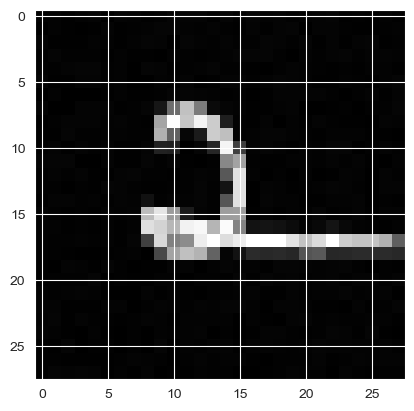

In [22]:
#Visualizing how the handwritten images would look
# Reshape a row into 28x28
image = df_features.iloc[1000].values.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.show()


In [23]:
#scaling is not required as all features already have the same scale (0-255) and are on the same measurement scale.
# scale = StandardScaler().fit_transform(dataframe2)
# print(scale)

pca = PCA(n_components=6)
Scores = pca.fit_transform(df_features)

tab = pd.DataFrame(data = Scores, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
# print(tab)

# print(pca.explained_variance_ratio_)
print('Through PC1, explained variance: ',round(pca.explained_variance_ratio_[0]*100,2), "%")
print('Through PC2, explained variance: ',round(pca.explained_variance_ratio_[1]*100,2), "%")

Through PC1, explained variance:  13.83 %
Through PC2, explained variance:  8.26 %


It can be seen that First Prinicipal component gives 13.83% of variance, which is heighest among all other principal components.

PC2 is having less variance than PC1. 

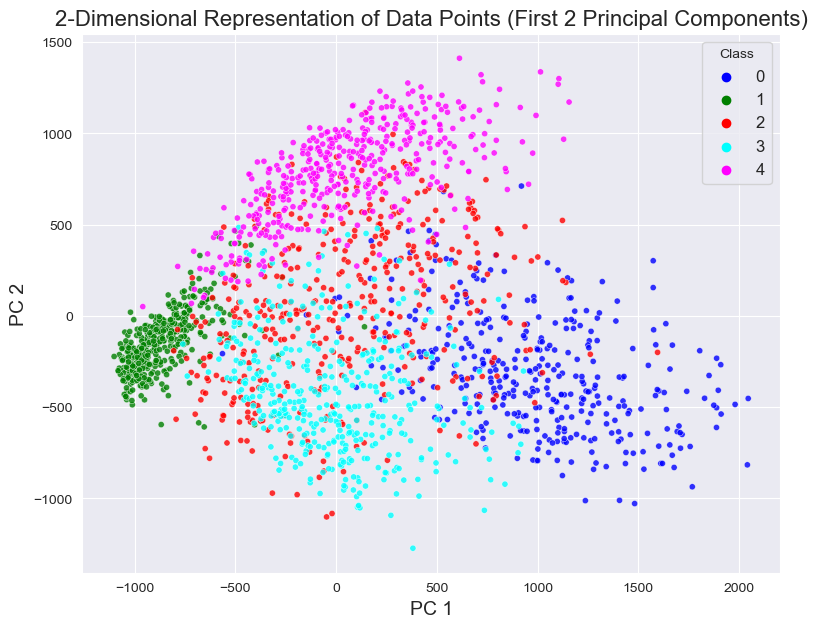

In [24]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta']

# Creating a DataFrame for the data
data = {'PC1': Scores[:, 0], 'PC2': Scores[:, 1], 'Class': labels}
df = pd.DataFrame(data)

plt.figure(figsize=(9, 7)) 

sns.set_style("darkgrid")

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Class', palette=colors, alpha=0.8, s=20)

plt.title('2-Dimensional Representation of Data Points (First 2 Principal Components)', fontsize=16)
plt.xlabel('PC 1', fontsize=14)
plt.ylabel('PC 2', fontsize=14)
plt.legend(title='Class', fontsize=12)

plt.show()

# Methodology :
Feature data was transformed into two main components using Principal Component Analysis (PCA). To obtain a bidimensional representation, the
decomposition module's PCA function was used with n_components=2. The scatter plot was created using sns.scatterplot, and each class is represented by a different color.

# Results:

# Explained Variance:

1. The first principal component (PC1) explains approximately 13.83% of the variance within the data.
2. The second principal component (PC2) accounts for roughly 8.26% of the variance.
3. Combined, PC1 and PC2 explain 22.09% of the total variance, indicating that there is still a significant amount of variance (nearly 77.91%) that is not
captured by the first two principal components

# Analysis by Class:

1. Class 0 (Blue): This class is clearly positioned to the right of the scatter plot, with data points easily distinguished from the other classes. There is some
overlap with Classes 2 & 3.
2. Class 1 (Green): Forms a tight cluster on the left side of the plot, indicating consistency within the class. The concentration of Class 1 data points
indicates lower within-class variance and high similarity among its features, as captured by the first two principal components.
3. Class 2 (Red): Shows a dispersed pattern across a large portion of the plot, particularly along the PC1 axis, indicating significant within-class
variability. There is an observable overlap with Class 3, which could indicate similarities in features that are not clearly separated by the first two principal
components.
4. Class 3 (Cyan): Although tighly clustered when compared to Class2, Class 3 data points are distributed across the plot, with a strong presence along the
PC1 axis, indicating within-class variance and overlap with Class 2. This suggests a nuanced similarity between Classes 2 and 3, which may require
analysis beyond the first two principal components to achieve clear differentiation.
5. Class 4 (Purple): Positioned in the upper left quadrant, Class 4 shows a concentrated distribution with limited dispersion along both principal
components.The isolated position of Class 4 suggests distinct characteristics that are effectively captured by the first two principal components.


# 3. Repeat step 2 for the 5th and 6st components. Comment on the result

In [25]:
pca = PCA(n_components=6)
Scores = pca.fit_transform(df_features)

tab = pd.DataFrame(data = Scores, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
# print(tab)

print(pca.explained_variance_ratio_)
print('Through PC5, explained variance: ',round(pca.explained_variance_ratio_[4]*100,2), "%")
print('Through PC6, explained variance: ',round(pca.explained_variance_ratio_[5]*100,2), "%")

[0.13830927 0.082556   0.06319271 0.06083464 0.05080716 0.03832563]
Through PC5, explained variance:  5.08 %
Through PC6, explained variance:  3.83 %


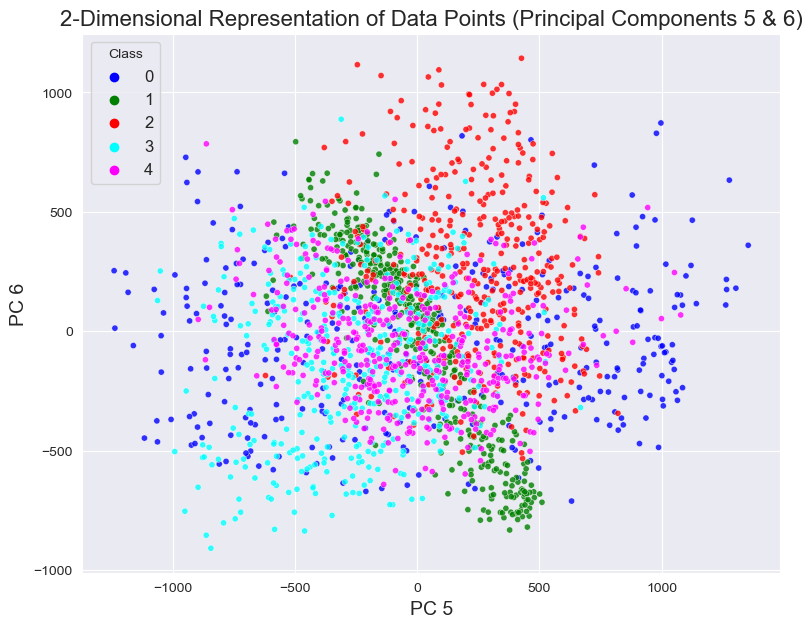

In [26]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta']

# Creating a DataFrame for the data
data = {'PC5': Scores[:, 4], 'PC6': Scores[:, 5], 'Class': labels}
df = pd.DataFrame(data)

plt.figure(figsize=(9, 7)) 

sns.set_style("darkgrid")

sns.scatterplot(data=df, x='PC5', y='PC6', hue='Class', palette=colors, alpha=0.8, s=20)

plt.title('2-Dimensional Representation of Data Points (Principal Components 5 & 6)', fontsize=16)
plt.xlabel('PC 5', fontsize=14)
plt.ylabel('PC 6', fontsize=14)
plt.legend(title='Class', fontsize=12)

plt.show()

# Methodology :
The dataset underwent Principal Component Analysis (PCA) transformation, and the first six principal components were identified. Here, we focus on the fifth and sixth components.

# Results:
Analysis by Class:
1. Class 0 (Blue): The data points for Class 0 are primarily located in the plot's lower left and right corners. This distribution suggests that Class 0 has a
wide range of characteristics when compared to PC5 and PC6, with some data points deviating significantly from the central cluster.
2. Class 1 (Green): Class 1 appears to be tightly clustered near the plot's central axis, with lower variance than the other classes. This tighter clustering
indicates that Class 1 features, as represented by PC5 and PC6, are more consistent.
3. Class 2 (Red): The points in Class 2 are dispersed throughout the central region of the plot, with no clear clustering pattern. This dispersion
indicates that Class 2 has a wide range of features that are only partially captured by the fifth and sixth principal components.
4. Class 3 (Cyan): Class 3 is widely distributed across the plot and overlaps substantially with Class 2. This overlap suggests that PC5 and PC6 do not
clearly distinguish these two classes, and they may share similar characteristics in the dimensions represented by these components.
5. Class 4 (Purple): Class 4 data points are primarily concentrated in the plot's center but are distributed across both axes. The spread indicates variability
within Class 4, but the central concentration indicates that these data points are less divergent in terms of PC5 and PC6 than the other classes.

# Explained Variance:
1. The fifth component (PC5) accounts for approximately 5.08% of the dataset variance.
2. The sixth component (PC6) explains about 3.83% of the variance.
3. Cumulatively, components 5 and 6 contribute to a minor extent (8.91%) in explaining the total dataset variance, reflecting the dataset's complexity and
multi-dimensionality.
4. PC1 accounts for approximately 13.83% of the variance, PC2 for 8.26%, PC3 for 6.32%, PC4 for 6.08%, PC5 for 5.08%, and PC6 for 3.83%.

# 4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error for the 8 sets against the retained variance of each case.

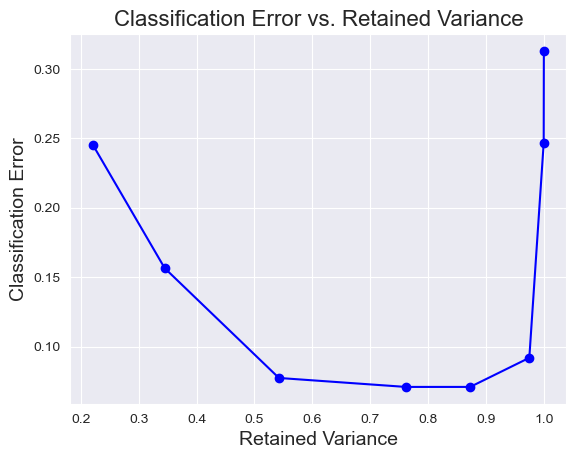

In [27]:
# Define the different numbers of components to be considered
components_list = [2, 4, 10, 30, 60, 200, 500, 784]
classification_errors = []
retained_variances = []

for n_components in components_list:
    # Apply PCA with the specified number of components
    pca_n = PCA(n_components=n_components)
    df_pca_n = pca_n.fit_transform(df_features)
 
    # Calculate the retained variance for this number of components
    retained_variance = np.sum(pca_n.explained_variance_ratio_)
    retained_variances.append(retained_variance)
 
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_pca_n, labels, test_size=0.3, random_state=42)
    
    # Initialize and train the Naive Bayes classifier
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
 
    # Predict on the test set and calculate the error
    y_pred = classifier.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    classification_errors.append(error)

# Plotting classification error vs. retained variance
plt.plot(retained_variances, classification_errors, marker='o', linestyle='-', color='blue')
plt.title('Classification Error vs. Retained Variance', fontsize=16)
plt.xlabel('Retained Variance', fontsize=14)
plt.ylabel('Classification Error', fontsize=14)

plt.show()

# 5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA) to reduce the dimensionality, plot the data points using the first 2 LDA components (display data points of each class with a different color). Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA


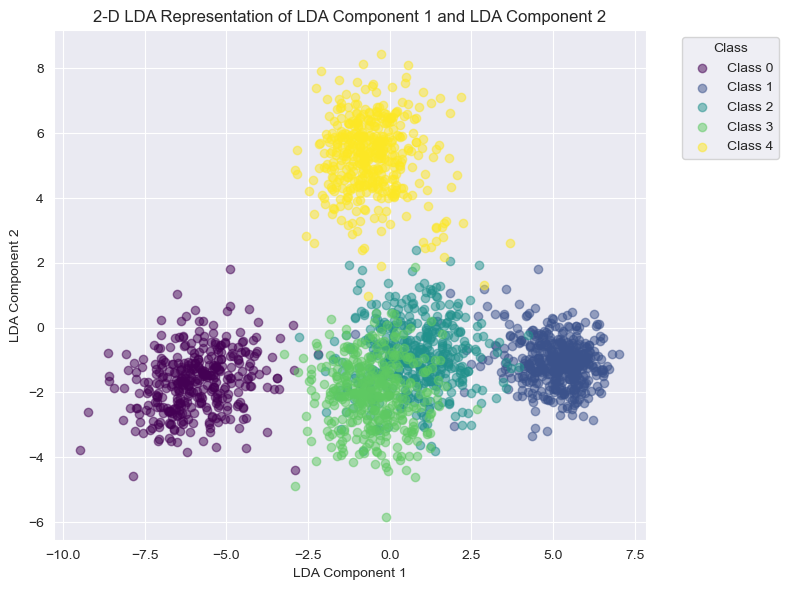

In [28]:
# Initialize LDA
lda = LDA(n_components=2)

# Fit LDA and transform the data
df_lda = lda.fit_transform(df_features, labels)

# Define unique labels and a colormap
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels))) # Generating colors

# Plotting the LDA transformed data with a legend
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    # Select only data points of the current class for plotting
    subset = df_lda[labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], color=colors[i], label=f'Class {label}', alpha=0.5)

# Create a legend outside the plot
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('2-D LDA Representation of LDA Component 1 and LDA Component 2')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.tight_layout()
plt.show()


# Methodology :

The LDA transformation was applied to the preprocessed feature data, along with the known class labels, to produce two discriminative components. The
procedure for LDA is similar to that of PCA, but it includes class labels to guide the transformation. A scatter plot was created to visualize the transformed data
for the first two LDA components. Each data point was colored based on its class label.


# Results:

# Analysis by Class:

1. Class 0 (Purple): Class 0 is located in the lower left quadrant and has a tight clustering pattern with minimal spread, indicating strong within-class
similarity and distinct separation based on the discriminant features represented by the LDA components.

2. Class 1 (Dark Blue): Class 1 is located in the lower right quadrant and is tightly clustered, indicating consistency within the class The closeness to Class 2
suggests some similarities, but the LDA components have successfully distinguished between them.

3. Class 2 (Teal Green): This class is located in the middle section of the plot, between Classes 1 and 3, and has a moderately dispersed distribution. The
overlap with Class 3 is noticeable, implying that the discriminant features captured by LDA do not completely separate these groups.

4. Class 3 (Green): Class 3 is located near Class 2 in the middle section, showing a moderate level of overlap with Class 2. This suggests that, while the
LDA components have identified some class-specific features, the first two discriminant components have not completely resolved the similarities between
Classes 2 and 3.

5. Class 4 (Yellow): Located in the upper quadrant, Class 4 has a dense cluster, indicating strong within-class cohesion and clear separation from the other
classes. The apparent distinction of Class 4 demonstrates LDA's effectiveness in capturing this class's unique features.


# Comparison with PCA:

The difference between PCA and LDA is how they handle class information.

PCA and LDA serve different purposes, and the choice between them depends on the goals of the analysis. 
PCA is ideal for dimensionality reduction and data compression, while LDA is more suitable for classification tasks where class separability is important.

PCA doesn't use class labels. It just tries to capture the overall variance in the data, which may not always align with class boundaries.

LDA, on the other hand, uses class labels to guide the dimensionality reduction process. It aims to maximize the separation between classes, resulting in clearer clusters.

In the absence of class labels or when the goal is not classification, PCA is often considered the best linear method for transformation with orthonormal bases(set of vectors that are both orthogonal and normalized).

Orthogonal: When 2 vectors are perpendicualr to each other(dot product is 0. Geometrically, it implies that the vectors point in different directions and are independent of each other.)

normalized: Each vector has magnitude of 1(vectors lie on the unit hypersphere).

So, if data has distinct class boundaries, LDA is likely to give better results than PCA.

# Conclusion 

The LDA plot shows distinct class clusters with minimal overlap. When comparing LDA Components 1 and 2 to PCA Components 1 and 2, it is clear that LDA achieves better class separation. This improved separation is due to the supervised nature of LDA, which, unlike PCA, incorporates class labels during the dimensionality reduction process. 

LDA aims to maximize the separation between different classes while minimizing the distance between data points within the
same class, resulting in a more defined class distinction in the reduced feature space.


# 6. Prove that the PCA is the best linear method for transformation (with orthonormal bases)



As PCA seeks an orthonormal basis, Prinicipal components(Eigen vectors) are orthogonal to each other.

The dot product between two eigenvectors being zero implies orthogonality. Checking if all elements of the dot product matrix are close to zero confirms that all pairs of eigenvectors are orthogonal, which is necessary for forming an orthonormal basis.

We check eigenvector normality by verifying if their norms are 1. This ensures they're unit-length, a prerequisite for an orthonormal basis.

In [29]:
#checking for Orthogonality
dot_products = np.dot(evec, evec.T)
is_orthogonal = np.allclose(dot_products, np.eye(evec.shape[1]))

#checking for Normality
norms = np.linalg.norm(evec, axis=0)
is_normalized = np.allclose(norms, 1)

if is_orthogonal:
    print("Eigenvectors form an orthonormal basis.")
else:
    print("Eigenvectors do not form an orthonormal basis.")
    
if is_normalized:
    print("The eigenvectors are normalized (i.e., form a unit length basis).")
else:
    print("The eigenvectors are not normalized.")
    

Eigenvectors form an orthonormal basis.
The eigenvectors are normalized (i.e., form a unit length basis).


PCA maximizes variance by identifying directions of maximum variance and minimizes distance by ensuring orthogonality between principal components, preserving information in reduced dimensions.

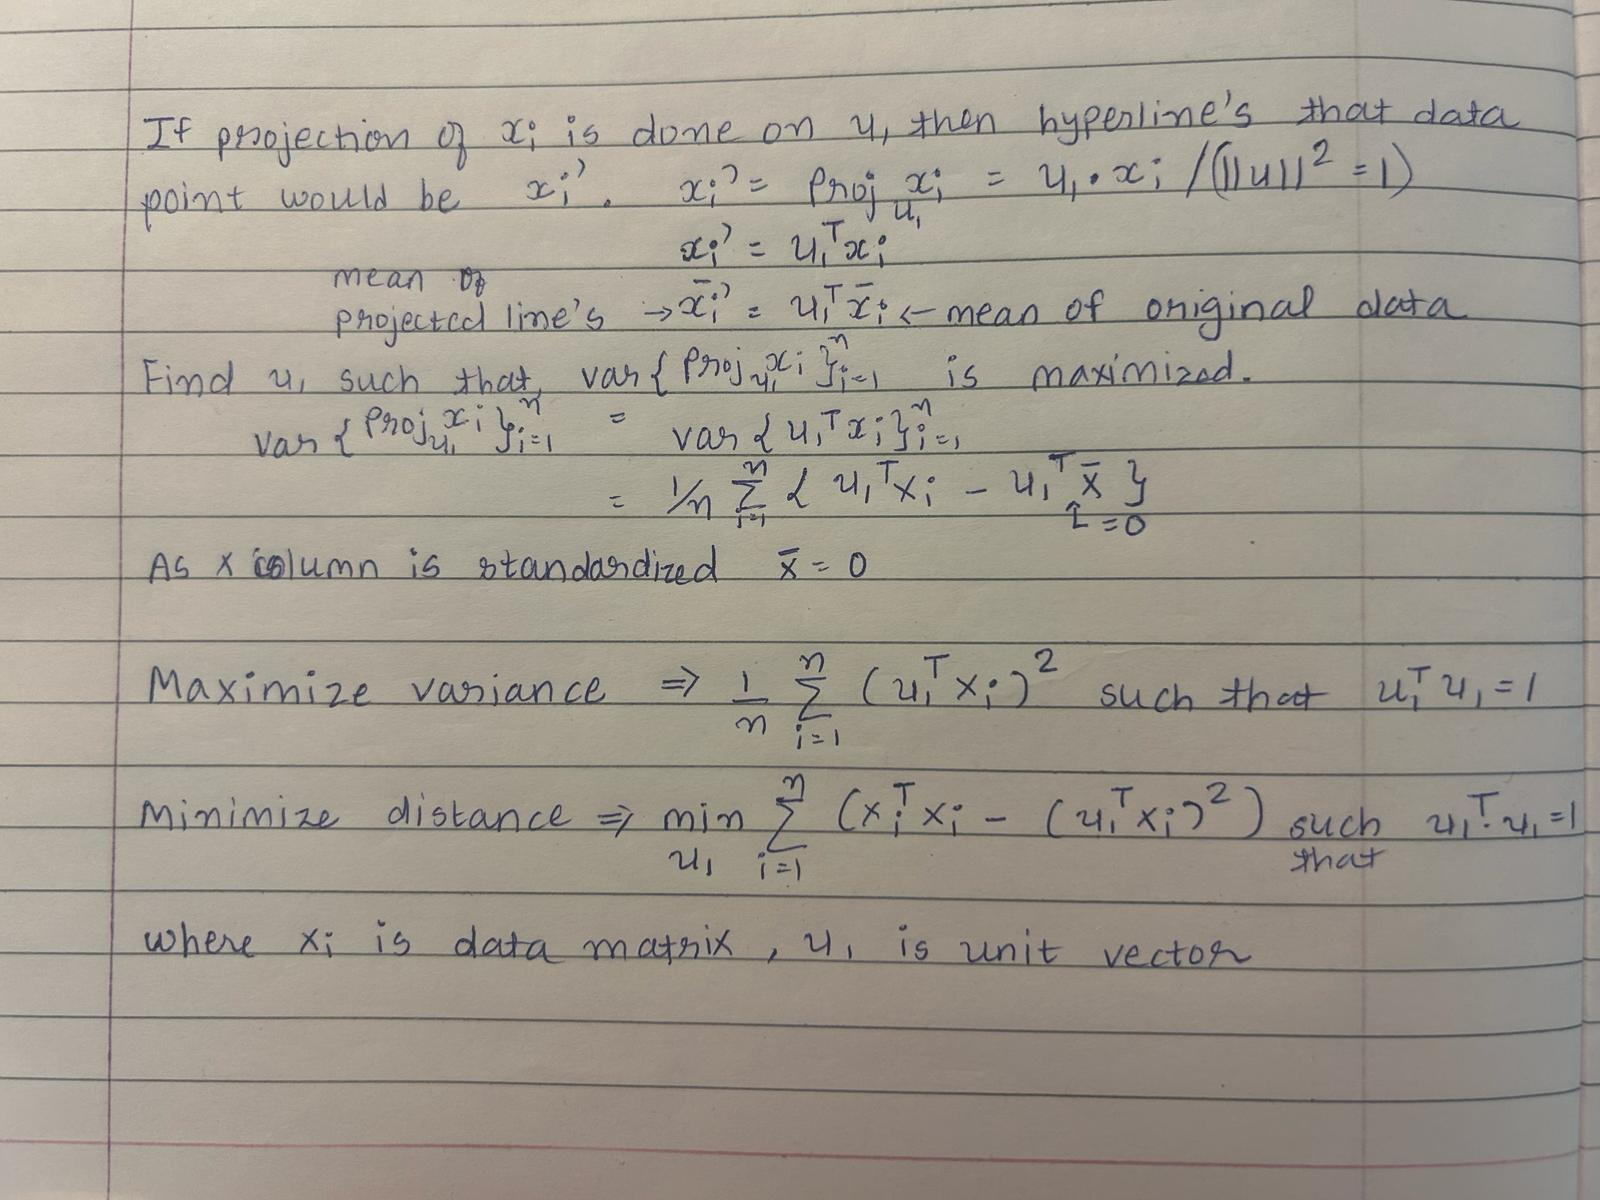

In [30]:
total_variance = np.sum(eval)
explained_variance_ratio = eval / total_variance

if np.isclose(np.sum(explained_variance_ratio), 1):
    print("Variance is maximized in PCA.")
else:
    print("Variance is not maximized in PCA.")

Variance is maximized in PCA.


In [31]:
from scipy.spatial.distance import pdist, squareform
dist_original = pdist(dataB)
dist_pca = pdist(df_features_scaled)

mean_dist_original = dist_original.mean()
mean_dist_pca = dist_pca.mean()

print("Mean distance in original space:", round(mean_dist_original,2))
print("Mean distance in PCA space:", round(mean_dist_pca,2))

Mean distance in original space: 2692.59
Mean distance in PCA space: 38.52


From above we can say that, Mean distance in original space is 2692.59, and after PCA has been done, Mean distance is becoming 38.52, which is far less than the original.


# Conclusion:

Principal Component Analysis (PCA) is often regarded as one of the best linear transformation methods due to its ability to capture the most important features of the data while reducing its dimensionality.

PCA achieves this by finding orthogonal directions, called principal components, that maximize the spread of the data. By maximizing variance along these components, PCA ensures that it retains as much information as possible while reducing the number of dimensions. Additionally, PCA minimizes the distance between data points in the transformed space, making it more compact and easier to analyze.
